# NBaIoT SOMKNN CLASSIFY

## Device 1

- Training on device 1 (using both Mirai and Gafgyt).
- Testing on device 1 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 1

In [8]:
train_index

1

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((49548, 115), (49548,)),
 ((316650, 115), (316650,)),
 ((652100, 115), (652100,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((34683, 115), (14865, 115), (34683,), (14865,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((221655, 115), (94995, 115), (221655,), (94995,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((456470, 115), (195630, 115), (456470,), (195630,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

34683


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(34683, 115) (34683,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(69366, 115) (69366,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(34683, 115) (34683,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(69366, 115) (69366,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(109860, 115) (109860,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((14865, 115), (94995, 115), (14865,), (94995,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(210495, 115) (210495,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(147346, 115) (147346,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [30]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='rand')

--------------Training and testing in the same device----------------
(69366, 115) (69366,)
------------Scale data-----------------
(69366, 115) (69366,)
X_train_scaled
[[ 3.29612709e-03  1.21268756e-01  0.00000000e+00 ...  9.73875109e-18
   5.68714750e-30  1.94359005e-13]
 [ 3.29612709e-03  1.16513119e-01  0.00000000e+00 ...  1.74196825e-17
  -5.33030687e-34  0.00000000e+00]
 [ 6.58594153e-03  1.21268756e-01  1.06290987e-17 ...  9.73875109e-18
   1.68012462e-33  5.75224125e-17]
 ...
 [ 3.29612758e-03  7.13345701e-02  1.54319329e-09 ...  4.85741148e-18
  -1.04821934e-33 -7.19848165e-17]
 [ 9.85861840e-03  1.21268756e-01  2.12581974e-17 ...  8.70984127e-18
  -3.30077580e-36  0.00000000e+00]
 [ 1.31838629e-02  1.21268756e-01  1.06290987e-17 ...  2.31624350e-16
   1.06308770e-27  1.49859300e-12]]
---------Normalize data--------------
(69366, 115) (69366,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1 * pc[pc_order[0]] + c2 * pc[pc_order[1]]


Perform SOM (turned) train random
0.5
Total train time: 328.1089415550232


### Test on the same device

#### Test on gafgyt

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.995     0.996     14865
           2      0.999     0.999     0.999     94995

    accuracy                          0.999    109860
   macro avg      0.998     0.997     0.998    109860
weighted avg      0.999     0.999     0.999    109860



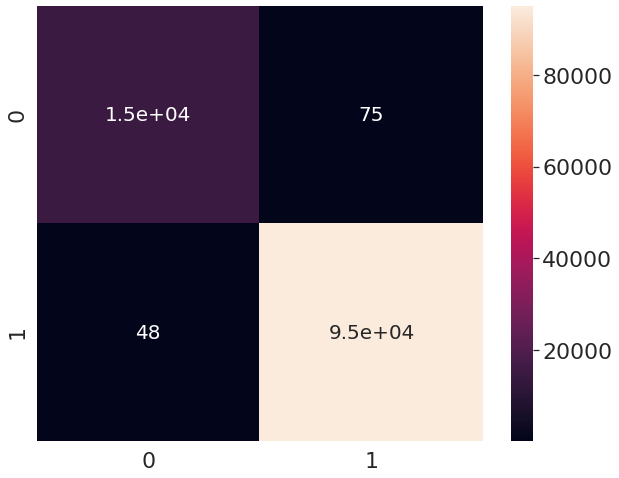

AUC score:  0.9972246507849026


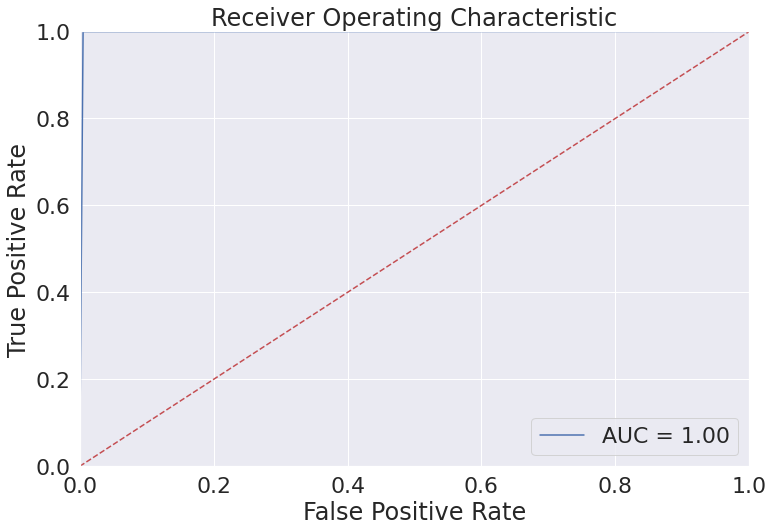

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [32]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.995     0.996     14865
           2      0.999     0.999     0.999     94995

    accuracy                          0.999    109860
   macro avg      0.998     0.997     0.998    109860
weighted avg      0.999     0.999     0.999    109860



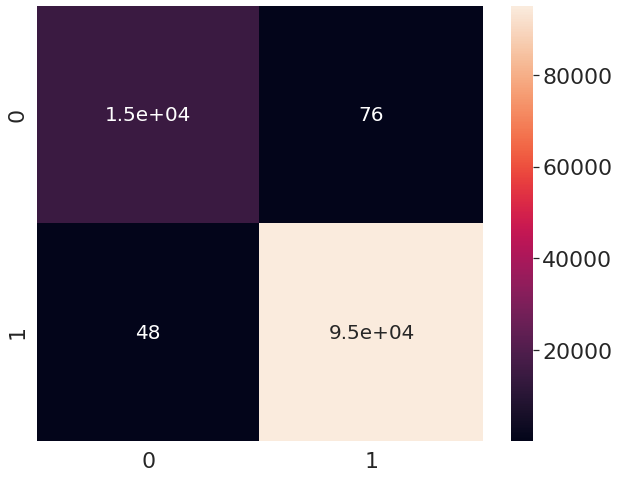

AUC score:  0.9971910147270484


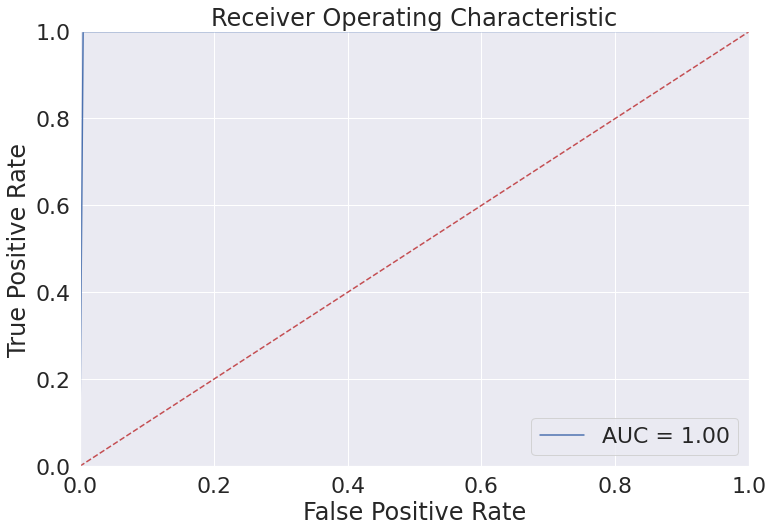

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [31]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.247     0.995     0.396     10413
           2      0.999     0.770     0.870    136933

    accuracy                          0.786    147346
   macro avg      0.623     0.882     0.633    147346
weighted avg      0.946     0.786     0.836    147346



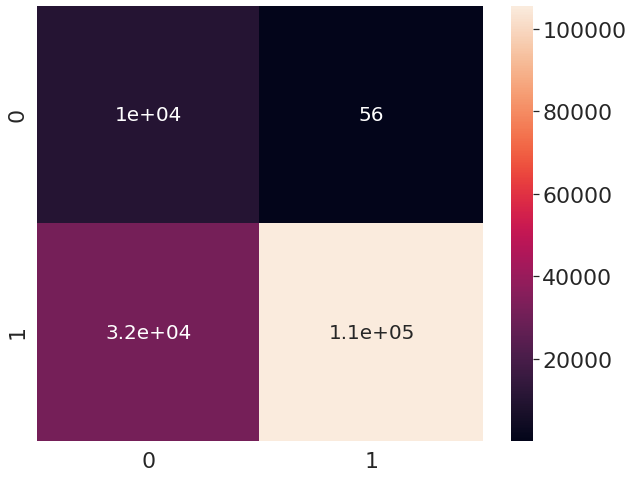

AUC score:  0.8822000137852792


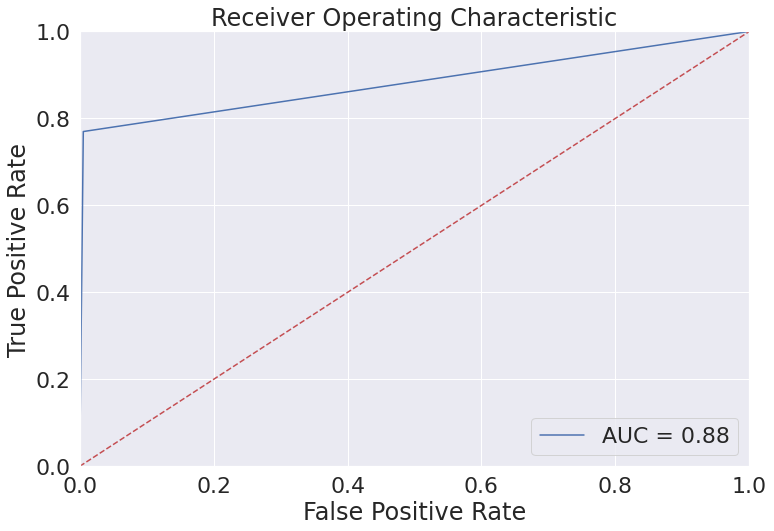

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [33]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.247     0.995     0.396     10413
           2      0.999     0.770     0.870    136933

    accuracy                          0.786    147346
   macro avg      0.623     0.882     0.633    147346
weighted avg      0.946     0.786     0.836    147346



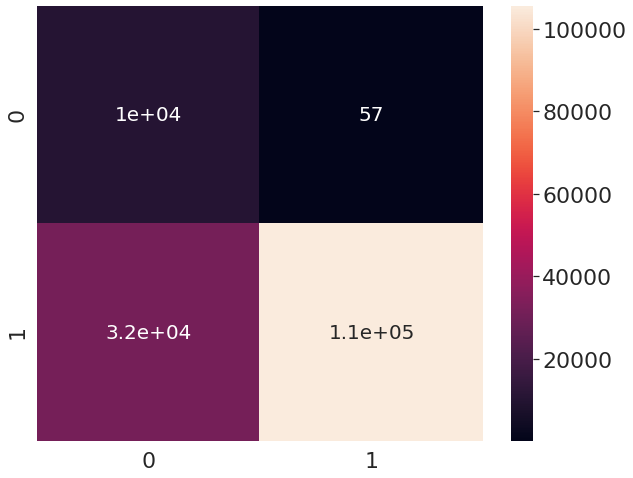

AUC score:  0.8821519968833298


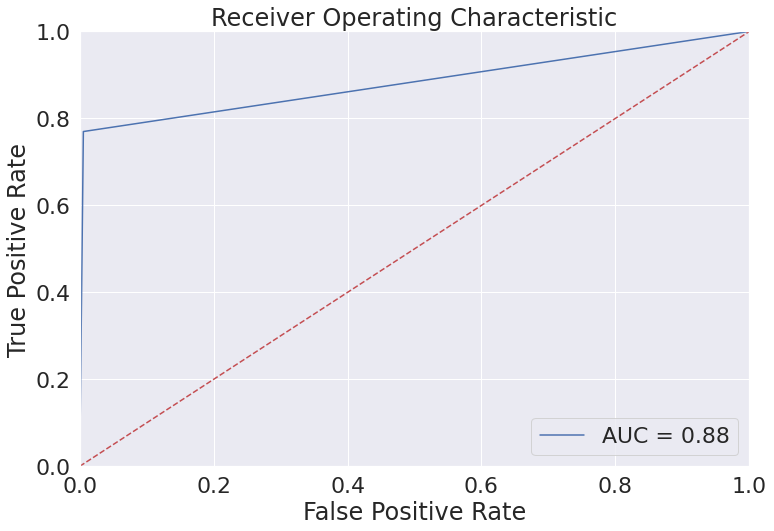

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [34]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [35]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='tpe')

--------------Training and testing in the same device----------------
(69366, 115) (69366,)
------------Scale data-----------------
(69366, 115) (69366,)
X_train_scaled
[[ 3.29612709e-03  1.21268756e-01  0.00000000e+00 ...  9.73875109e-18
   5.68714750e-30  1.94359005e-13]
 [ 3.29612709e-03  1.16513119e-01  0.00000000e+00 ...  1.74196825e-17
  -5.33030687e-34  0.00000000e+00]
 [ 6.58594153e-03  1.21268756e-01  1.06290987e-17 ...  9.73875109e-18
   1.68012462e-33  5.75224125e-17]
 ...
 [ 3.29612758e-03  7.13345701e-02  1.54319329e-09 ...  4.85741148e-18
  -1.04821934e-33 -7.19848165e-17]
 [ 9.85861840e-03  1.21268756e-01  2.12581974e-17 ...  8.70984127e-18
  -3.30077580e-36  0.00000000e+00]
 [ 1.31838629e-02  1.21268756e-01  1.06290987e-17 ...  2.31624350e-16
   1.06308770e-27  1.49859300e-12]]
---------Normalize data--------------
(69366, 115) (69366,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1 * pc[pc_order[0]] + c2 * pc[pc_order[1]]


0.5
Total train time: 286.4774360656738


### Test on first device

#### Test on gafgyt

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.984     0.997     0.990     14865
           2      0.999     0.997     0.998     94995

    accuracy                          0.997    109860
   macro avg      0.992     0.997     0.994    109860
weighted avg      0.997     0.997     0.997    109860



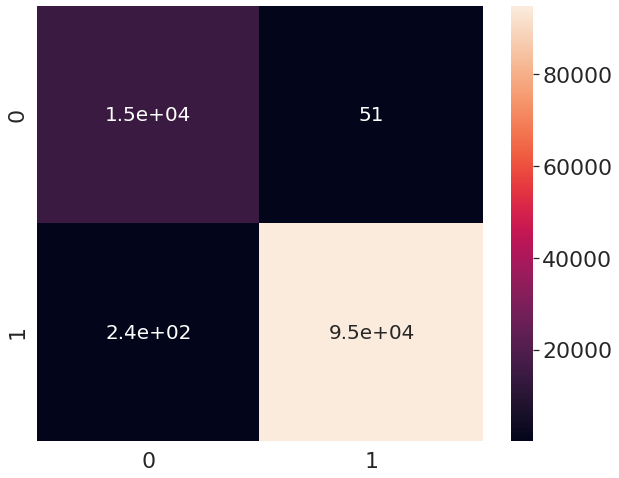

AUC score:  0.9970002829295439


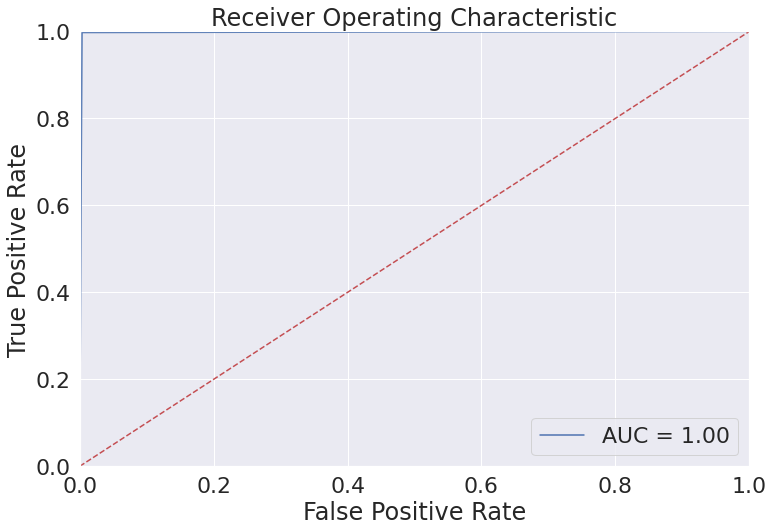

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [36]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.984     0.997     0.990     14865
           2      0.999     0.997     0.998     94995

    accuracy                          0.997    109860
   macro avg      0.992     0.997     0.994    109860
weighted avg      0.997     0.997     0.997    109860



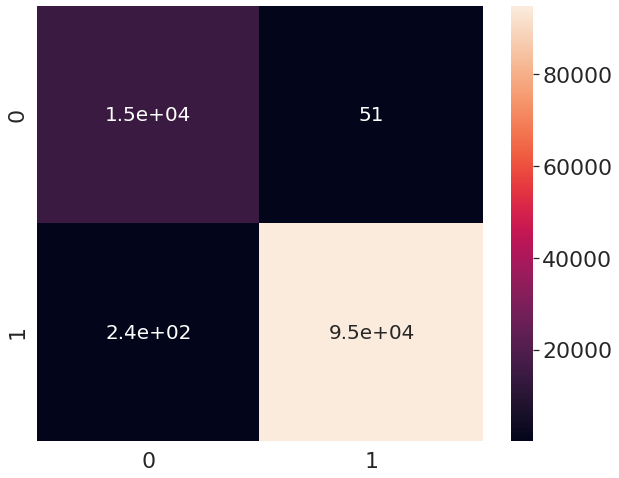

AUC score:  0.9970055463644616


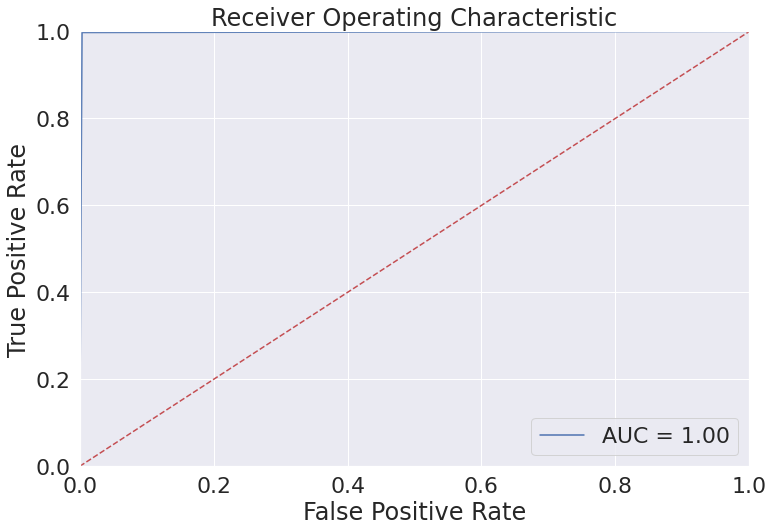

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [37]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.160     0.996     0.276     10413
           2      1.000     0.603     0.752    136933

    accuracy                          0.631    147346
   macro avg      0.580     0.800     0.514    147346
weighted avg      0.940     0.631     0.719    147346



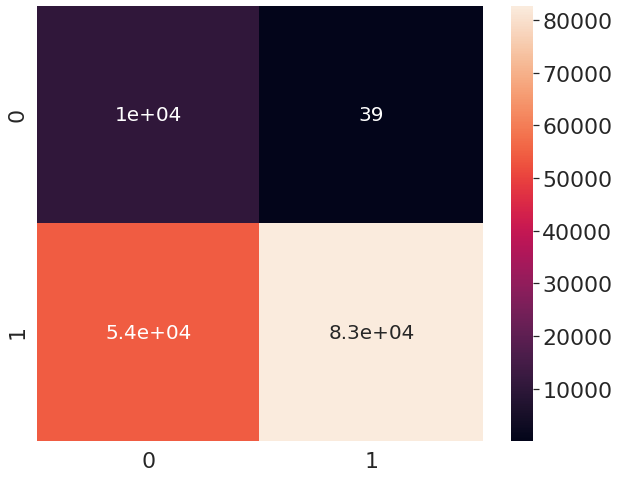

AUC score:  0.7996872277759831


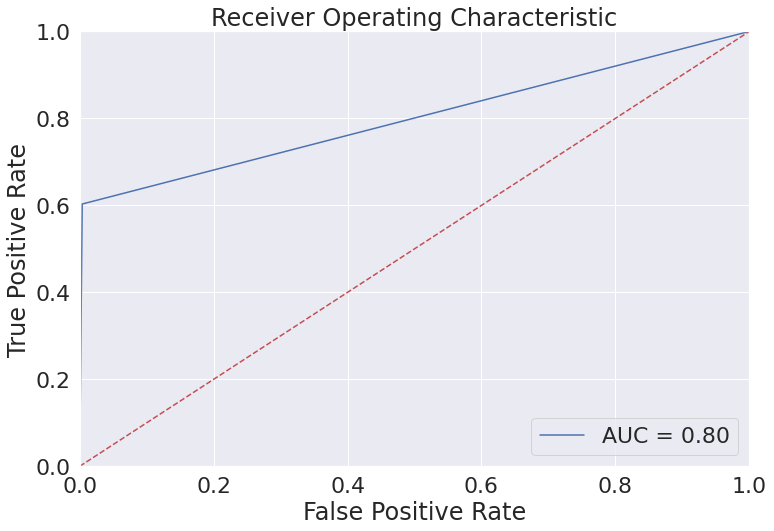

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [38]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.259     0.996     0.411     10413
           2      1.000     0.783     0.878    136933

    accuracy                          0.798    147346
   macro avg      0.629     0.890     0.645    147346
weighted avg      0.947     0.798     0.845    147346



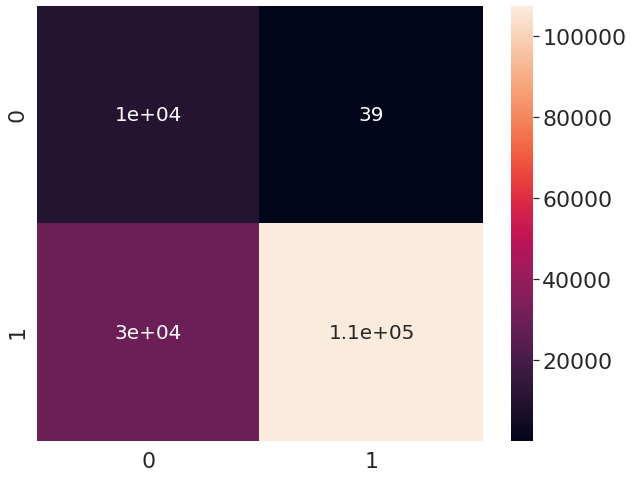

AUC score:  0.8897385667519785


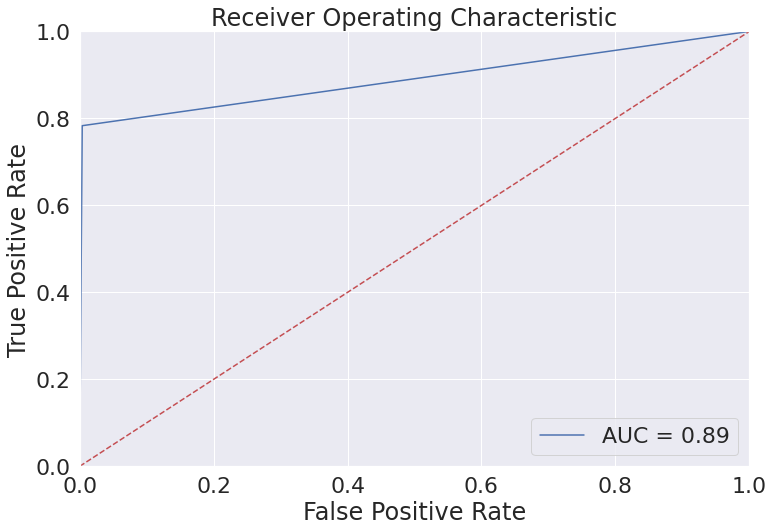

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [39]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [40]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(69366, 115) (69366,)
------------Scale data-----------------
(69366, 115) (69366,)
X_train_scaled
[[ 3.29612709e-03  1.21268756e-01  0.00000000e+00 ...  9.73875109e-18
   5.68714750e-30  1.94359005e-13]
 [ 3.29612709e-03  1.16513119e-01  0.00000000e+00 ...  1.74196825e-17
  -5.33030687e-34  0.00000000e+00]
 [ 6.58594153e-03  1.21268756e-01  1.06290987e-17 ...  9.73875109e-18
   1.68012462e-33  5.75224125e-17]
 ...
 [ 3.29612758e-03  7.13345701e-02  1.54319329e-09 ...  4.85741148e-18
  -1.04821934e-33 -7.19848165e-17]
 [ 9.85861840e-03  1.21268756e-01  2.12581974e-17 ...  8.70984127e-18
  -3.30077580e-36  0.00000000e+00]
 [ 1.31838629e-02  1.21268756e-01  1.06290987e-17 ...  2.31624350e-16
   1.06308770e-27  1.49859300e-12]]
---------Normalize data--------------
(69366, 115) (69366,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.982     0.994     0.988     14865
           2      0.999     0.997     0.998     94995

    accuracy                          0.997    109860
   macro avg      0.990     0.996     0.993    109860
weighted avg      0.997     0.997     0.997    109860



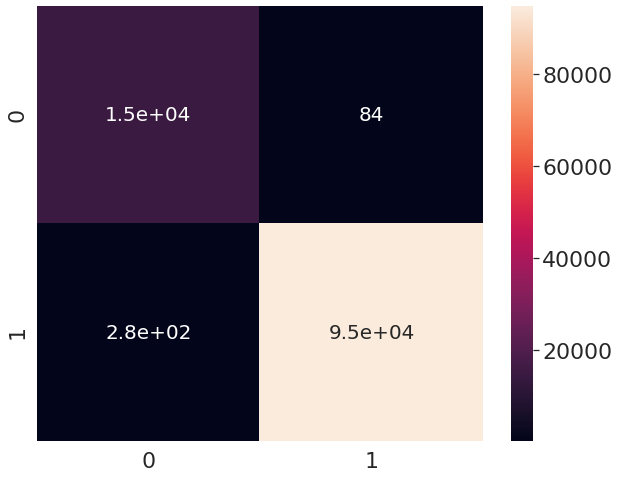

AUC score:  0.9957165996680797


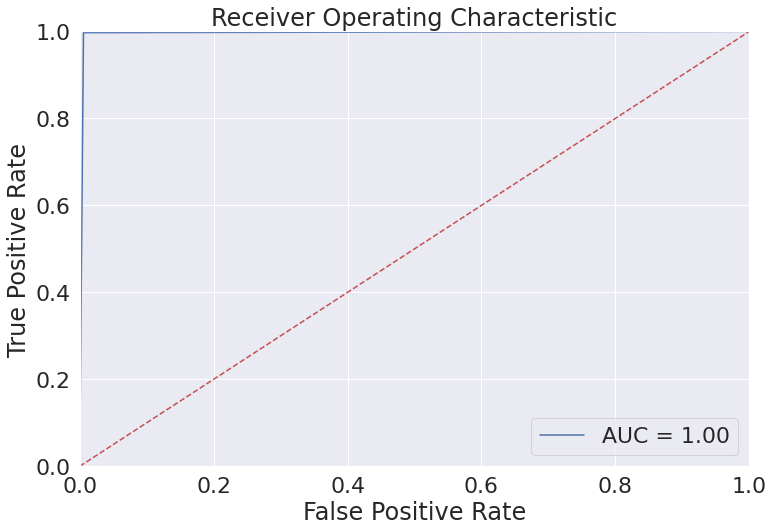

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [41]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.982     0.994     0.988     14865
           2      0.999     0.997     0.998     94995

    accuracy                          0.997    109860
   macro avg      0.990     0.996     0.993    109860
weighted avg      0.997     0.997     0.997    109860



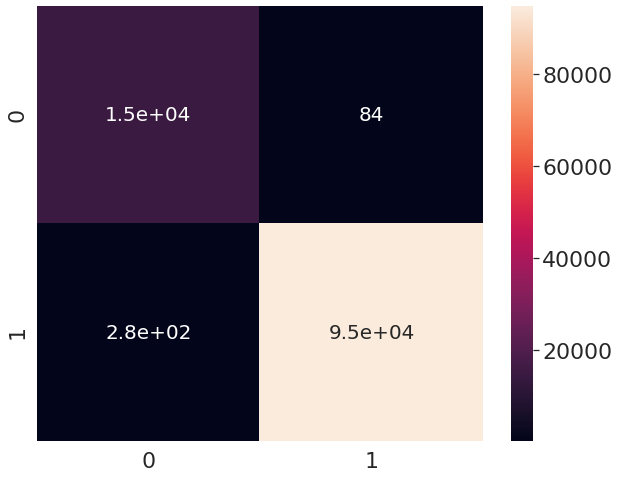

AUC score:  0.9957165996680797


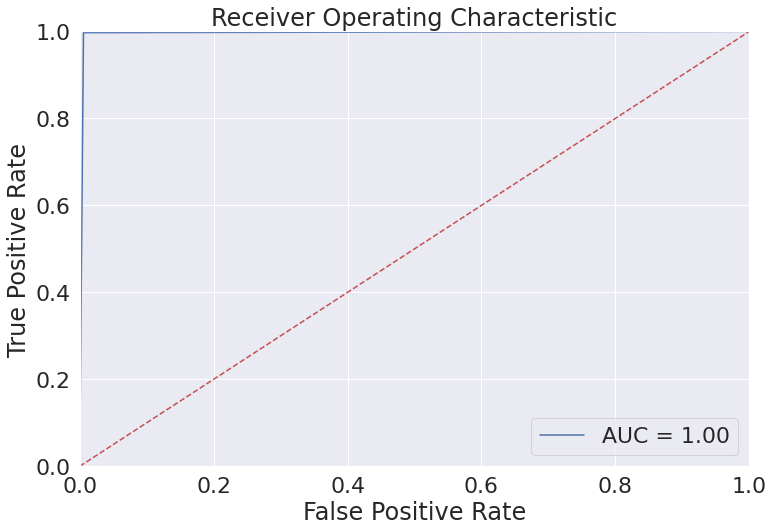

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.155     0.994     0.269     10413
           2      0.999     0.589     0.741    136933

    accuracy                          0.618    147346
   macro avg      0.577     0.792     0.505    147346
weighted avg      0.940     0.618     0.708    147346



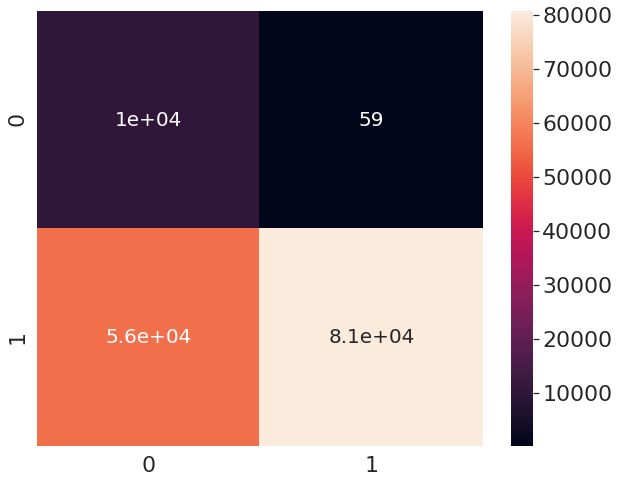

AUC score:  0.7917125104420097


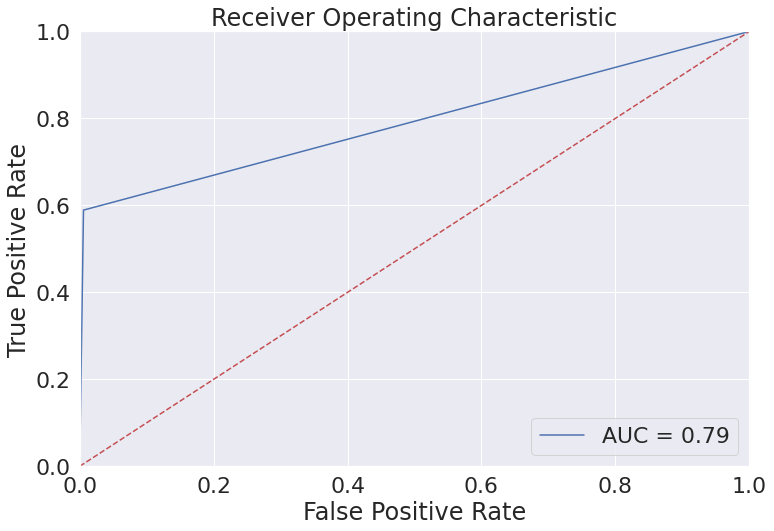

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.155     0.994     0.269     10413
           2      0.999     0.589     0.741    136933

    accuracy                          0.618    147346
   macro avg      0.577     0.792     0.505    147346
weighted avg      0.940     0.618     0.708    147346



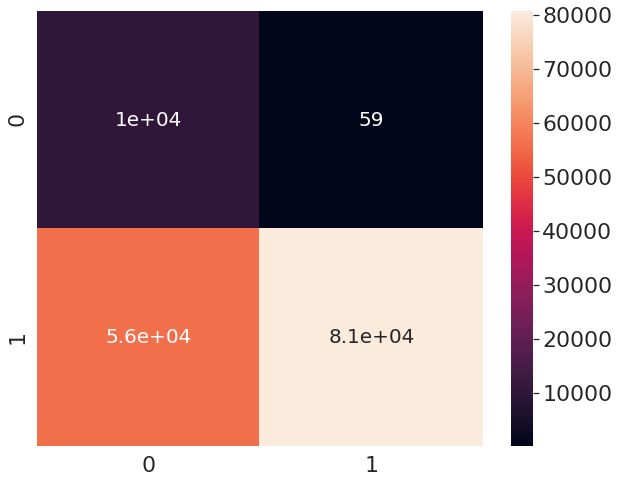

AUC score:  0.7917125104420097


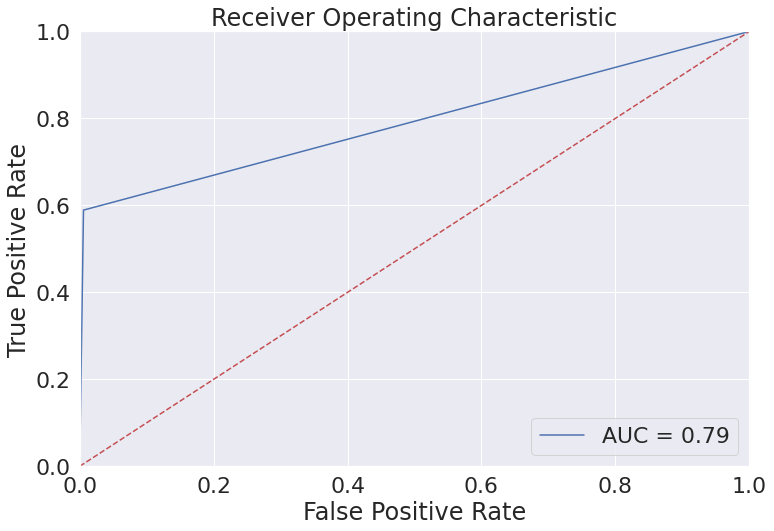

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.4. Anneal

### Train

In [45]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='anneal')

--------------Training and testing in the same device----------------
(69366, 115) (69366,)
------------Scale data-----------------
(69366, 115) (69366,)
X_train_scaled
[[ 3.29612709e-03  1.21268756e-01  0.00000000e+00 ...  9.73875109e-18
   5.68714750e-30  1.94359005e-13]
 [ 3.29612709e-03  1.16513119e-01  0.00000000e+00 ...  1.74196825e-17
  -5.33030687e-34  0.00000000e+00]
 [ 6.58594153e-03  1.21268756e-01  1.06290987e-17 ...  9.73875109e-18
   1.68012462e-33  5.75224125e-17]
 ...
 [ 3.29612758e-03  7.13345701e-02  1.54319329e-09 ...  4.85741148e-18
  -1.04821934e-33 -7.19848165e-17]
 [ 9.85861840e-03  1.21268756e-01  2.12581974e-17 ...  8.70984127e-18
  -3.30077580e-36  0.00000000e+00]
 [ 1.31838629e-02  1.21268756e-01  1.06290987e-17 ...  2.31624350e-16
   1.06308770e-27  1.49859300e-12]]
---------Normalize data--------------
(69366, 115) (69366,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.984     0.995     0.990     14865
           2      0.999     0.998     0.998     94995

    accuracy                          0.997    109860
   macro avg      0.992     0.996     0.994    109860
weighted avg      0.997     0.997     0.997    109860



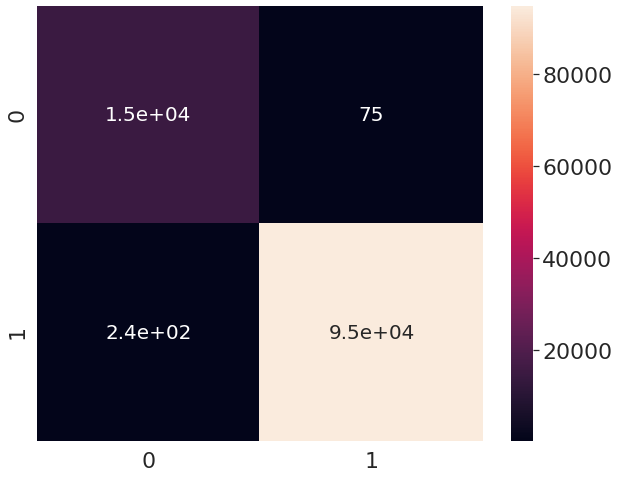

AUC score:  0.9962403884553062


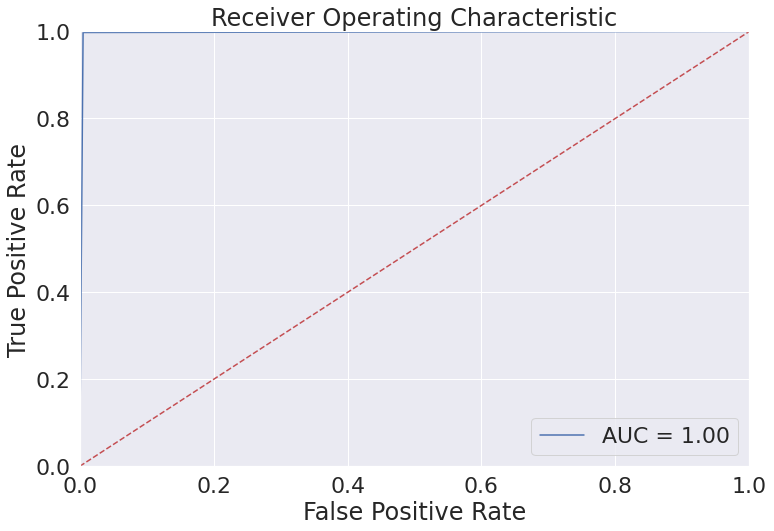

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.985     0.995     0.990     14865
           2      0.999     0.998     0.998     94995

    accuracy                          0.997    109860
   macro avg      0.992     0.996     0.994    109860
weighted avg      0.997     0.997     0.997    109860



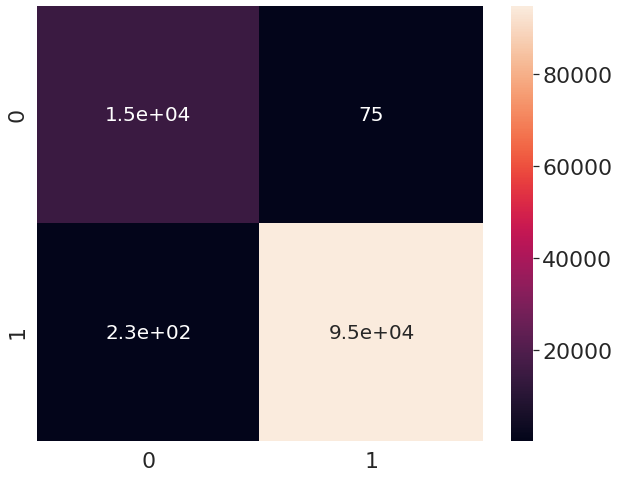

AUC score:  0.996271969064812


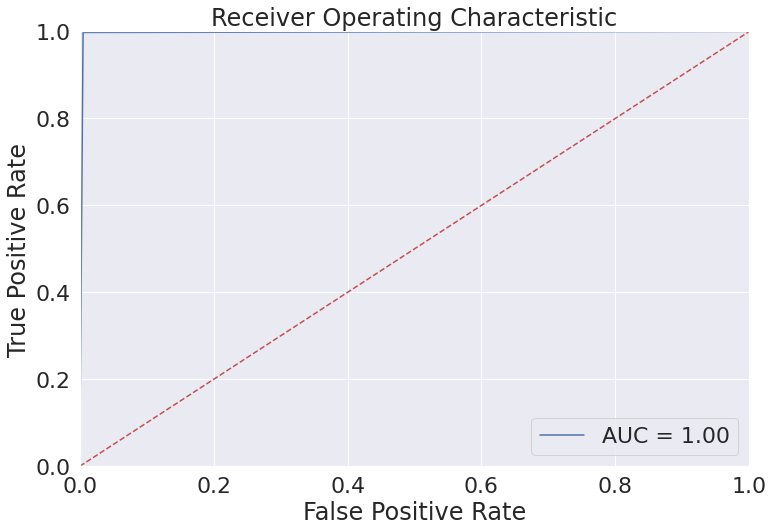

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.168     0.995     0.288     10413
           2      0.999     0.627     0.770    136933

    accuracy                          0.653    147346
   macro avg      0.584     0.811     0.529    147346
weighted avg      0.941     0.653     0.736    147346



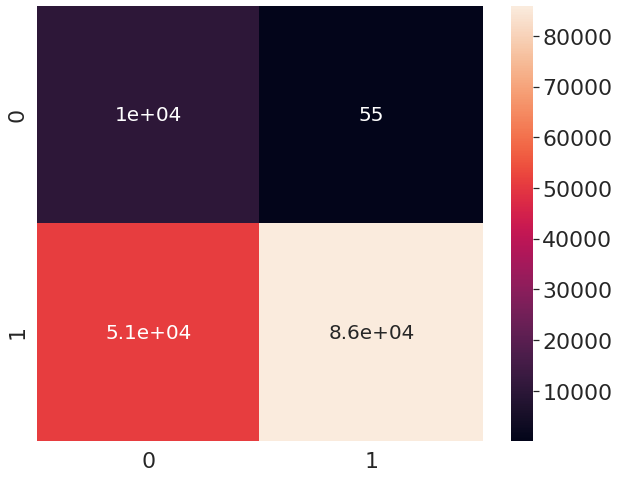

AUC score:  0.8106217609056569


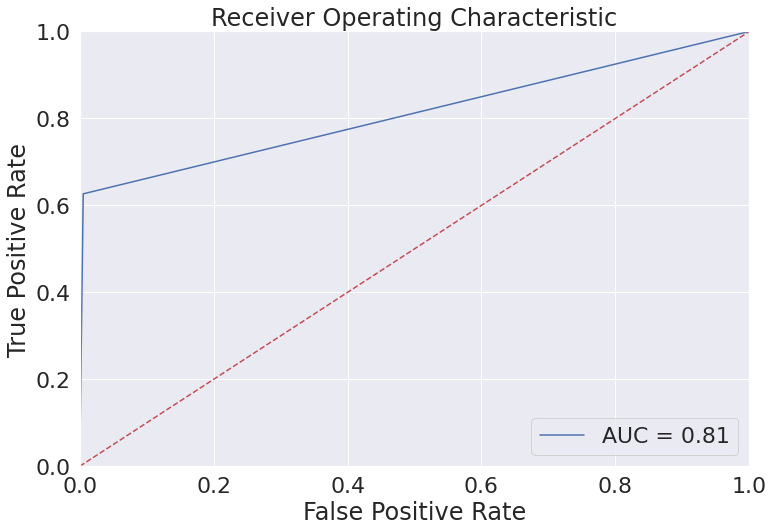

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.168     0.995     0.288     10413
           2      0.999     0.627     0.770    136933

    accuracy                          0.653    147346
   macro avg      0.584     0.811     0.529    147346
weighted avg      0.941     0.653     0.736    147346



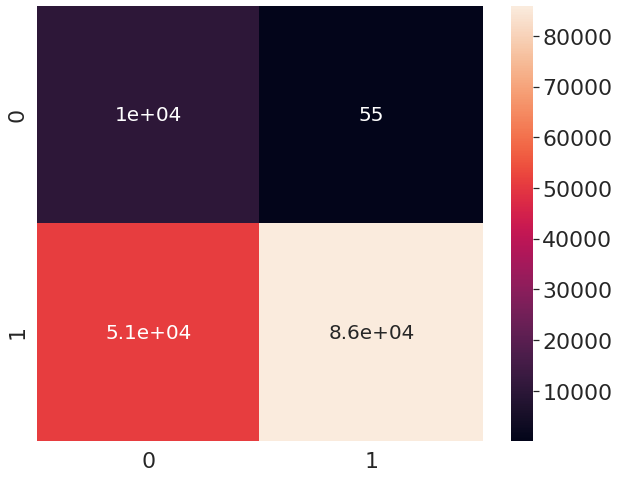

AUC score:  0.8106217609056569


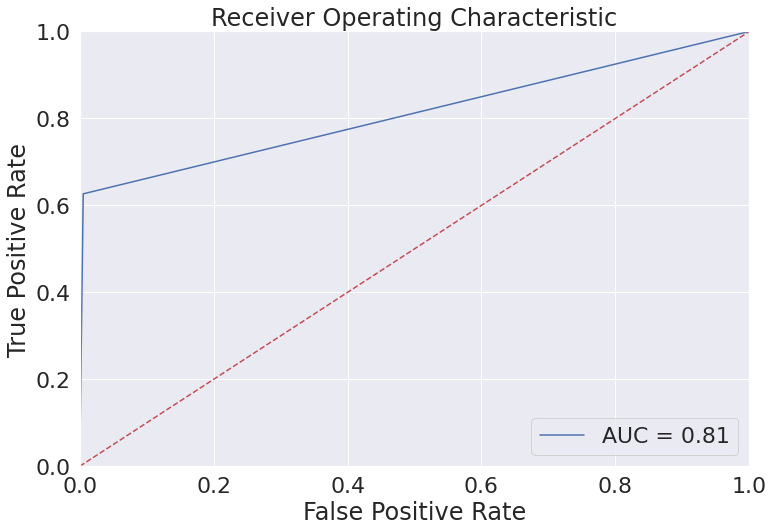

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [50]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='rand')

--------------Training and testing in the same device----------------
(69366, 115) (69366,)
------------Scale data-----------------
(69366, 115) (69366,)
X_train_scaled
[[ 3.00597876e-03  1.84273989e-01  0.00000000e+00 ...  3.74036249e-16
   1.74152528e-28  3.83142753e-13]
 [ 3.00597876e-03  1.77047558e-01  0.00000000e+00 ...  6.69037812e-16
  -1.63225311e-32  0.00000000e+00]
 [ 6.00620057e-03  1.84273989e-01  2.84335042e-17 ...  3.74036249e-16
   5.14489822e-32  1.13394775e-16]
 ...
 [ 3.00597922e-03  1.08396475e-01  4.12813862e-09 ...  1.86558621e-16
  -3.20987013e-32 -1.41904724e-16]
 [ 8.99079337e-03  1.84273989e-01  5.68670084e-17 ...  3.34518906e-16
  -1.01076761e-34  0.00000000e+00]
 [ 1.20233264e-02  1.84273989e-01  2.84335042e-17 ...  8.89599728e-15
   3.25540020e-26  2.95419833e-12]]
---------Normalize data--------------
(69366, 115) (69366,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.813     0.997     0.896     14865
           2      1.000     0.964     0.982     94995

    accuracy                          0.969    109860
   macro avg      0.906     0.981     0.939    109860
weighted avg      0.974     0.969     0.970    109860



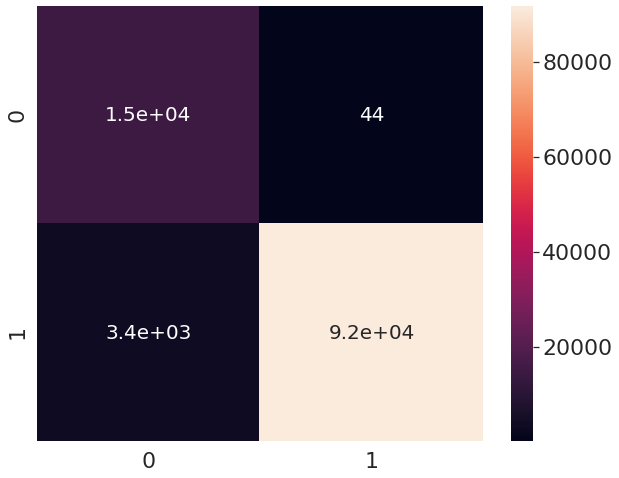

AUC score:  0.9806295981694082


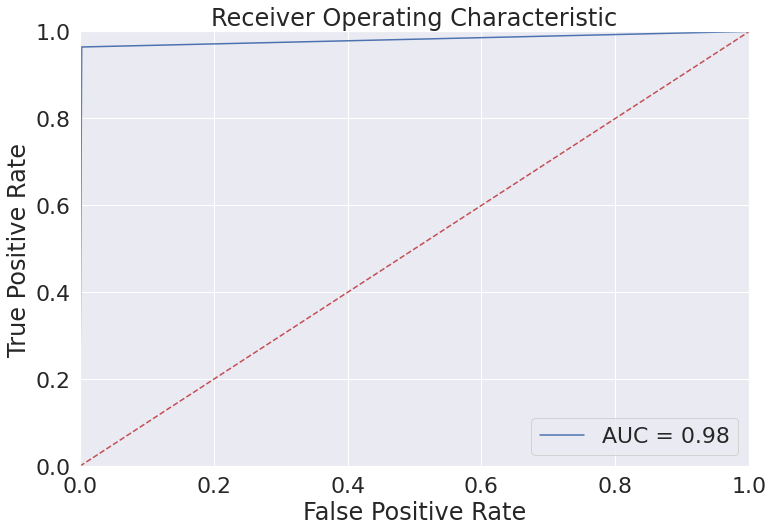

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [51]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.832     0.997     0.907     14865
           2      1.000     0.968     0.984     94995

    accuracy                          0.972    109860
   macro avg      0.916     0.983     0.945    109860
weighted avg      0.977     0.972     0.973    109860



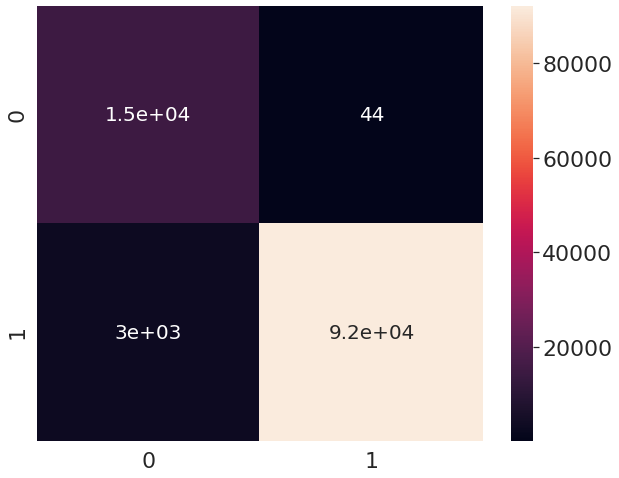

AUC score:  0.9827454990062943


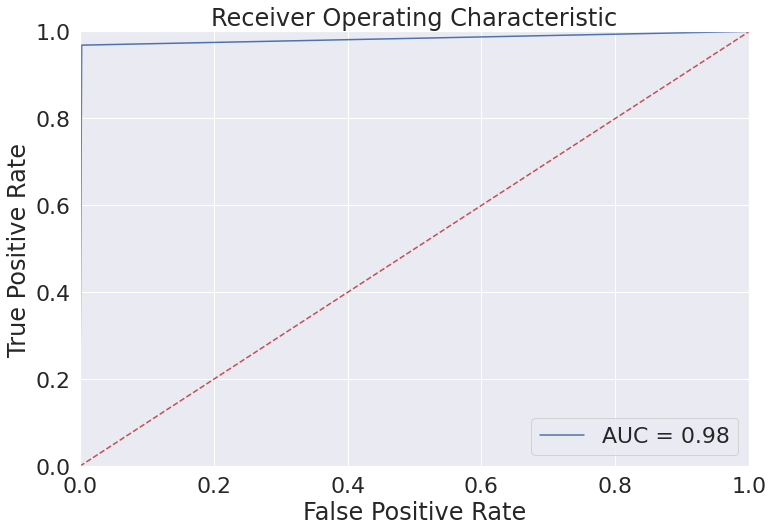

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [52]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.996     0.998     10413
           2      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      0.999     0.998     0.999    147346
weighted avg      1.000     1.000     1.000    147346



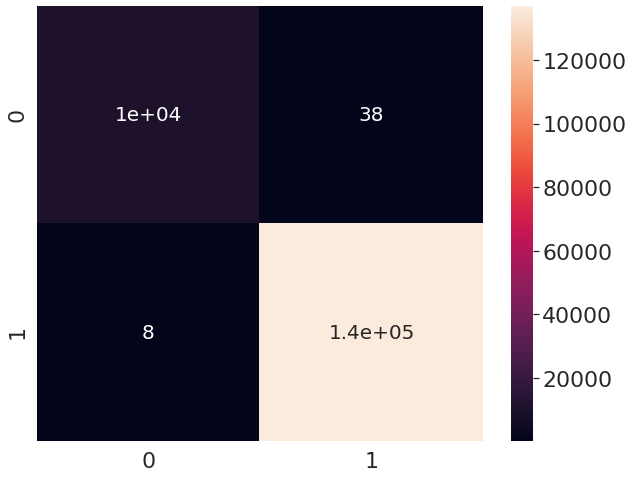

AUC score:  0.9981461463597769


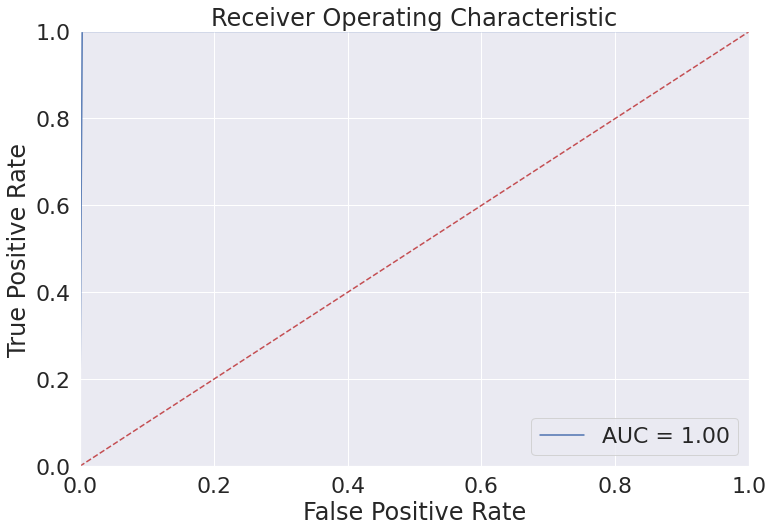

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [53]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.996     0.998     10413
           2      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      1.000     0.998     0.999    147346
weighted avg      1.000     1.000     1.000    147346



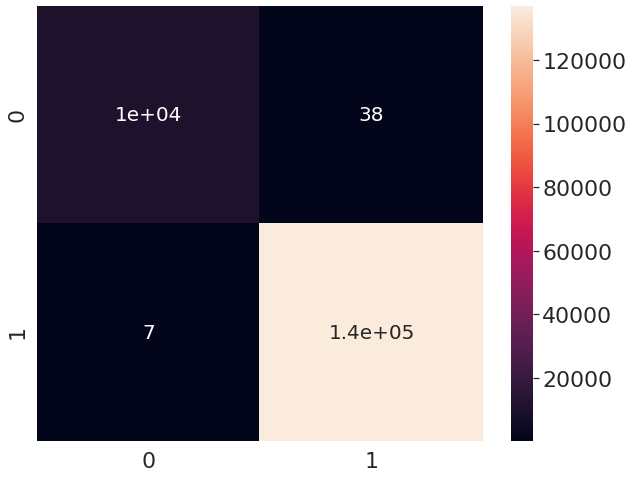

AUC score:  0.9981497977805449


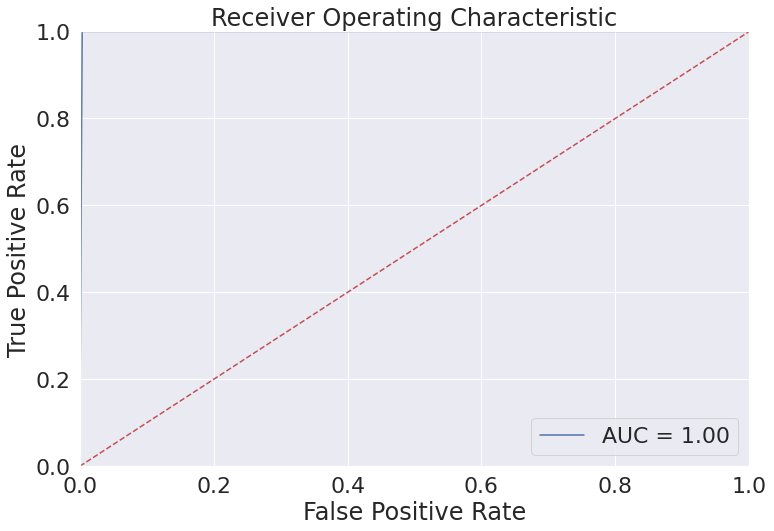

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [54]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [55]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='tpe')

--------------Training and testing in the same device----------------
(69366, 115) (69366,)
------------Scale data-----------------
(69366, 115) (69366,)
X_train_scaled
[[ 3.00597876e-03  1.84273989e-01  0.00000000e+00 ...  3.74036249e-16
   1.74152528e-28  3.83142753e-13]
 [ 3.00597876e-03  1.77047558e-01  0.00000000e+00 ...  6.69037812e-16
  -1.63225311e-32  0.00000000e+00]
 [ 6.00620057e-03  1.84273989e-01  2.84335042e-17 ...  3.74036249e-16
   5.14489822e-32  1.13394775e-16]
 ...
 [ 3.00597922e-03  1.08396475e-01  4.12813862e-09 ...  1.86558621e-16
  -3.20987013e-32 -1.41904724e-16]
 [ 8.99079337e-03  1.84273989e-01  5.68670084e-17 ...  3.34518906e-16
  -1.01076761e-34  0.00000000e+00]
 [ 1.20233264e-02  1.84273989e-01  2.84335042e-17 ...  8.89599728e-15
   3.25540020e-26  2.95419833e-12]]
---------Normalize data--------------
(69366, 115) (69366,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.822     0.998     0.901     14865
           2      1.000     0.966     0.983     94995

    accuracy                          0.970    109860
   macro avg      0.911     0.982     0.942    109860
weighted avg      0.976     0.970     0.972    109860



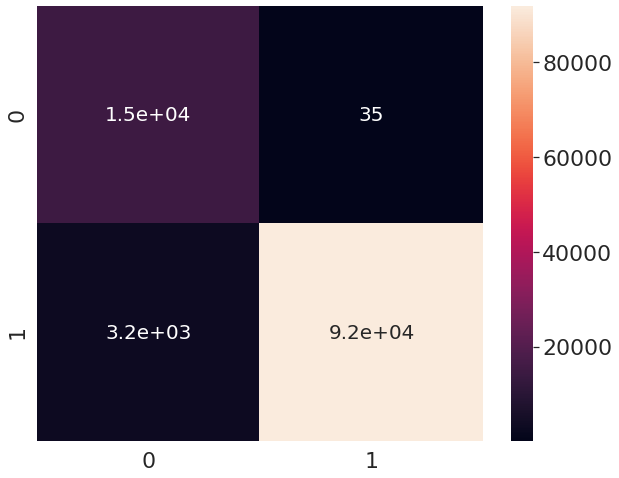

AUC score:  0.9819376387593611


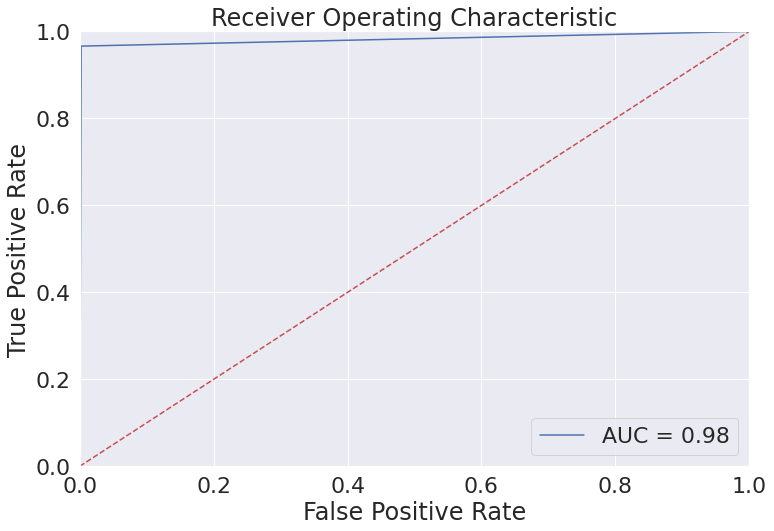

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [56]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.822     0.998     0.902     14865
           2      1.000     0.966     0.983     94995

    accuracy                          0.971    109860
   macro avg      0.911     0.982     0.942    109860
weighted avg      0.976     0.971     0.972    109860



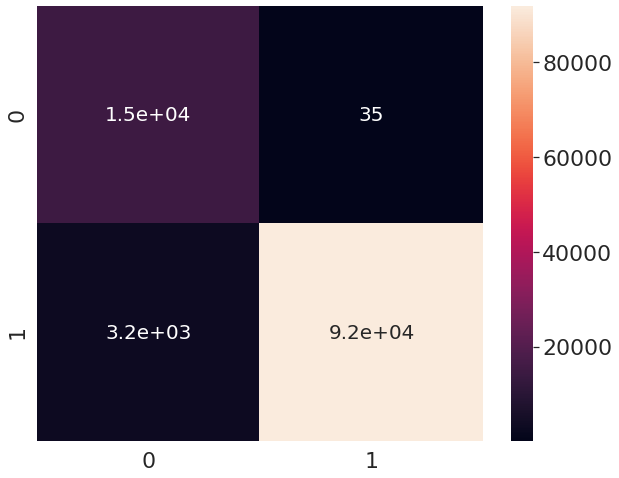

AUC score:  0.9819639559339494


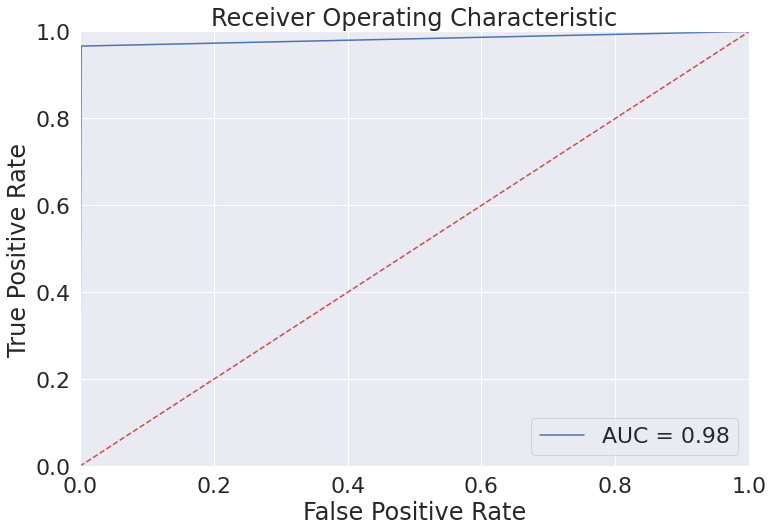

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [57]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.985     0.997     0.991     10413
           2      1.000     0.999     0.999    136933

    accuracy                          0.999    147346
   macro avg      0.993     0.998     0.995    147346
weighted avg      0.999     0.999     0.999    147346



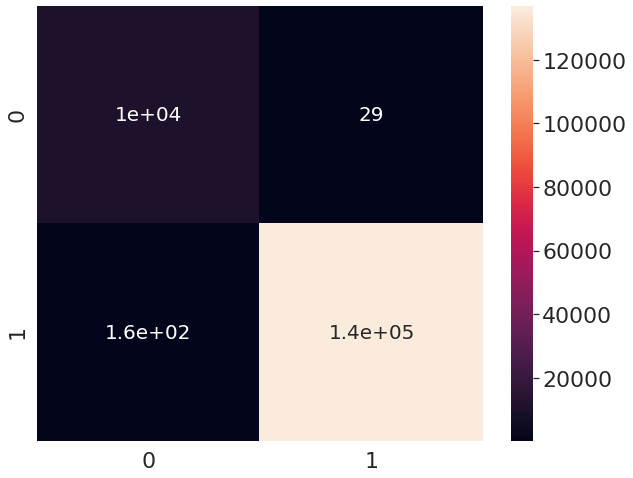

AUC score:  0.9980415396244529


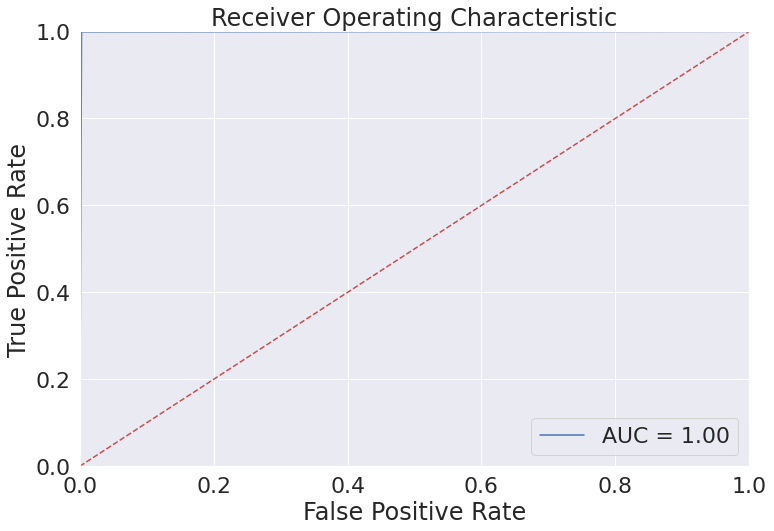

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [58]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.997     0.992     10413
           2      1.000     0.999     0.999    136933

    accuracy                          0.999    147346
   macro avg      0.993     0.998     0.996    147346
weighted avg      0.999     0.999     0.999    147346



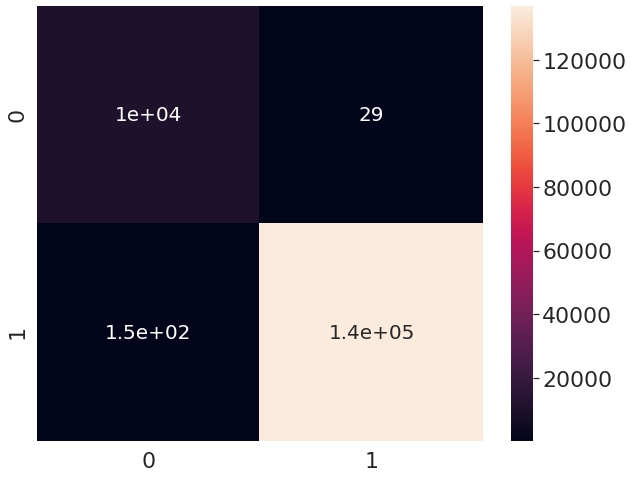

AUC score:  0.9980744024113632


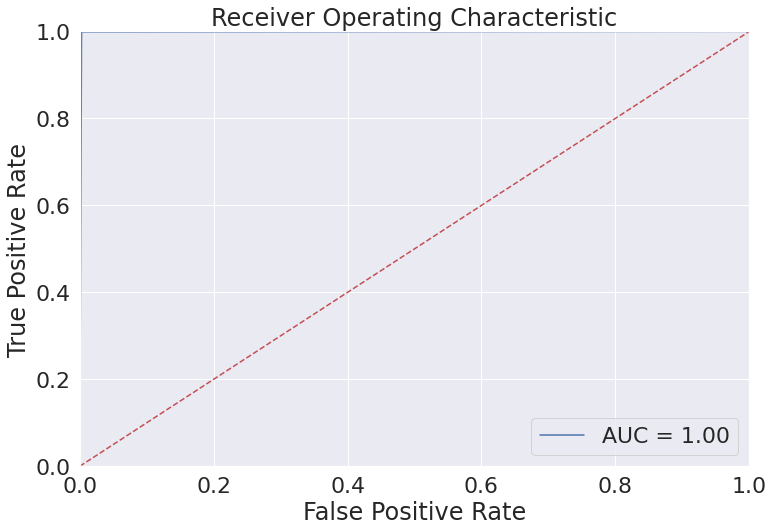

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [59]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [60]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(69366, 115) (69366,)
------------Scale data-----------------
(69366, 115) (69366,)
X_train_scaled
[[ 3.00597876e-03  1.84273989e-01  0.00000000e+00 ...  3.74036249e-16
   1.74152528e-28  3.83142753e-13]
 [ 3.00597876e-03  1.77047558e-01  0.00000000e+00 ...  6.69037812e-16
  -1.63225311e-32  0.00000000e+00]
 [ 6.00620057e-03  1.84273989e-01  2.84335042e-17 ...  3.74036249e-16
   5.14489822e-32  1.13394775e-16]
 ...
 [ 3.00597922e-03  1.08396475e-01  4.12813862e-09 ...  1.86558621e-16
  -3.20987013e-32 -1.41904724e-16]
 [ 8.99079337e-03  1.84273989e-01  5.68670084e-17 ...  3.34518906e-16
  -1.01076761e-34  0.00000000e+00]
 [ 1.20233264e-02  1.84273989e-01  2.84335042e-17 ...  8.89599728e-15
   3.25540020e-26  2.95419833e-12]]
---------Normalize data--------------
(69366, 115) (69366,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.713     0.997     0.831     14865
           2      0.999     0.937     0.967     94995

    accuracy                          0.945    109860
   macro avg      0.856     0.967     0.899    109860
weighted avg      0.961     0.945     0.949    109860



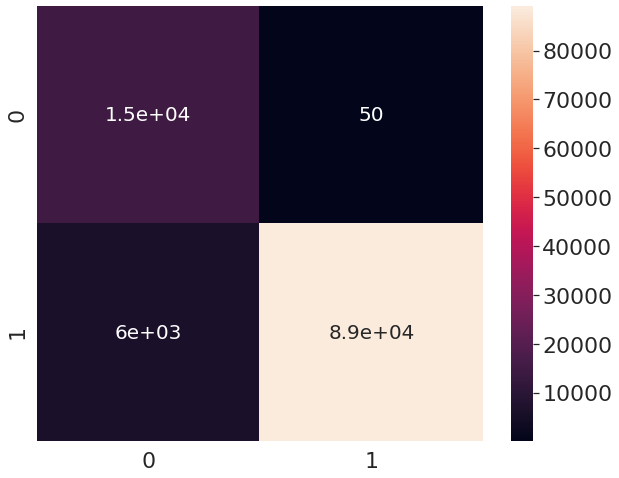

AUC score:  0.9669428615633231


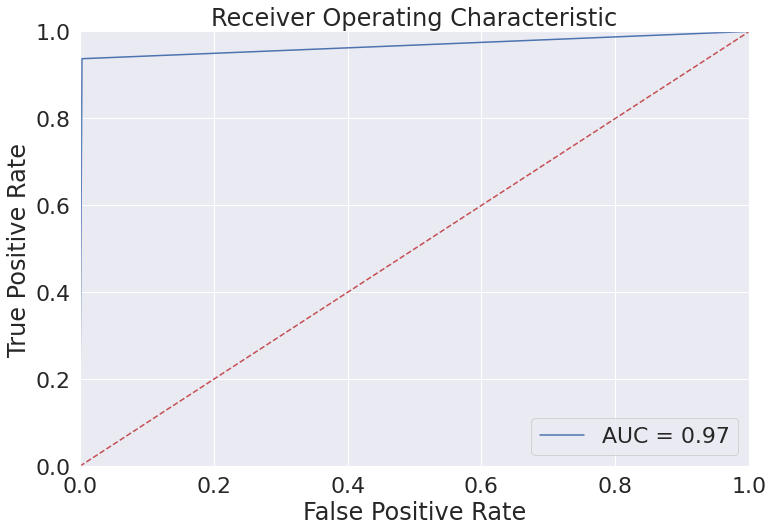

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [61]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.713     0.997     0.831     14865
           2      0.999     0.937     0.967     94995

    accuracy                          0.945    109860
   macro avg      0.856     0.967     0.899    109860
weighted avg      0.961     0.945     0.949    109860



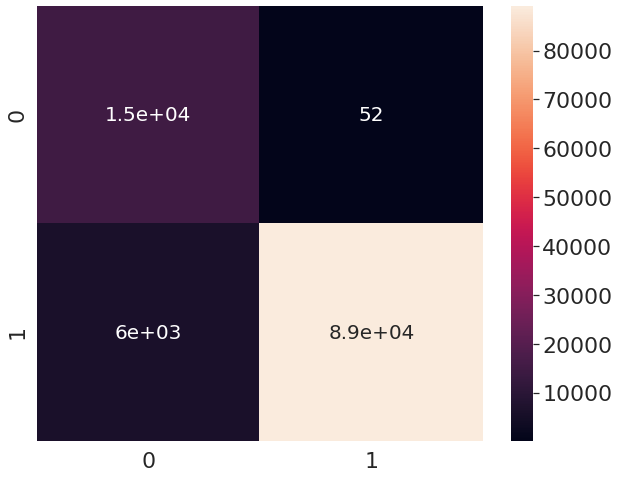

AUC score:  0.966875589447615


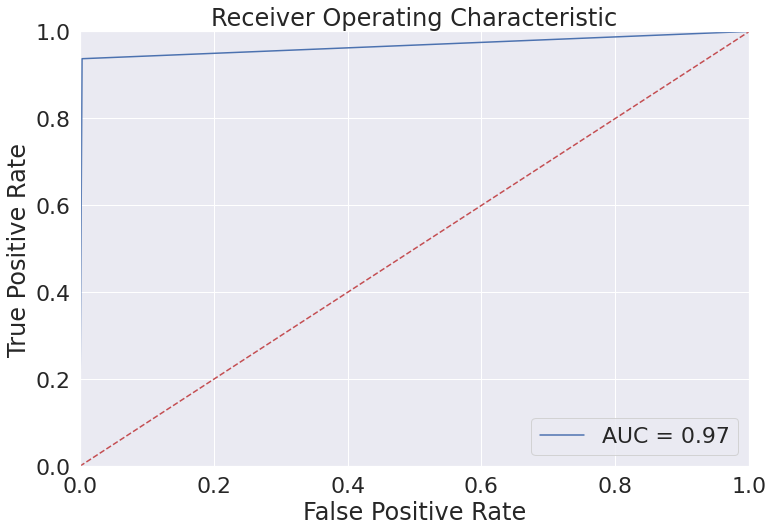

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [62]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.996     0.997     10413
           2      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      0.999     0.998     0.999    147346
weighted avg      1.000     1.000     1.000    147346



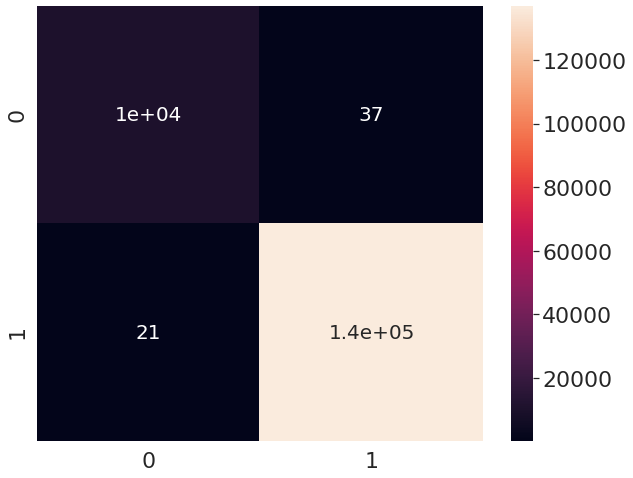

AUC score:  0.9981466947917448


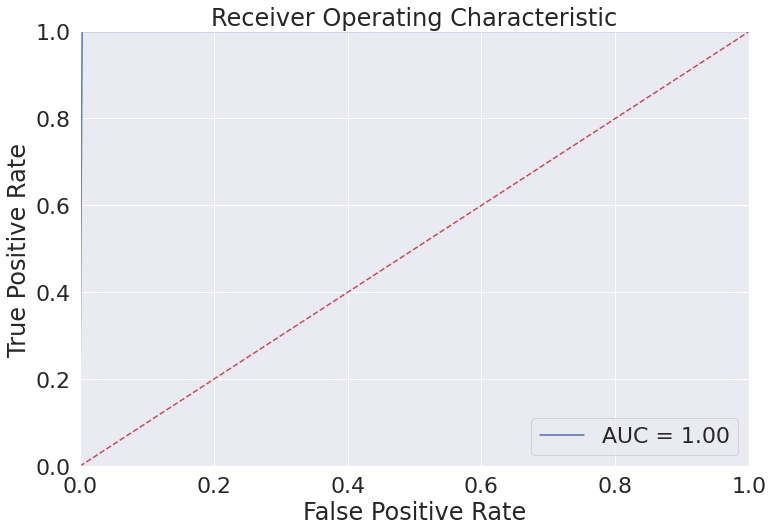

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [63]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.996     0.997     10413
           2      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      0.999     0.998     0.998    147346
weighted avg      1.000     1.000     1.000    147346



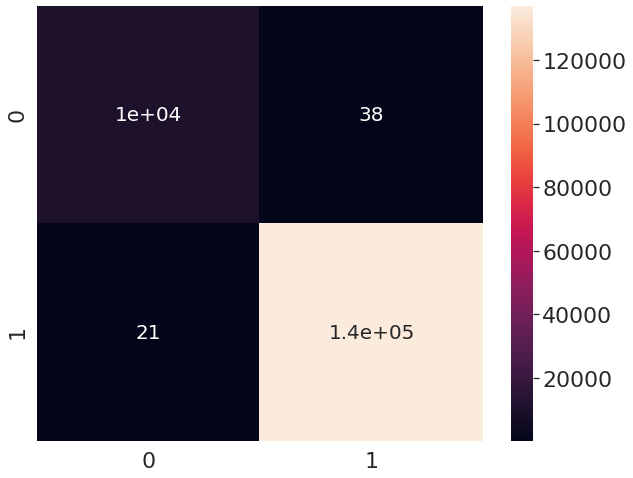

AUC score:  0.9980986778897953


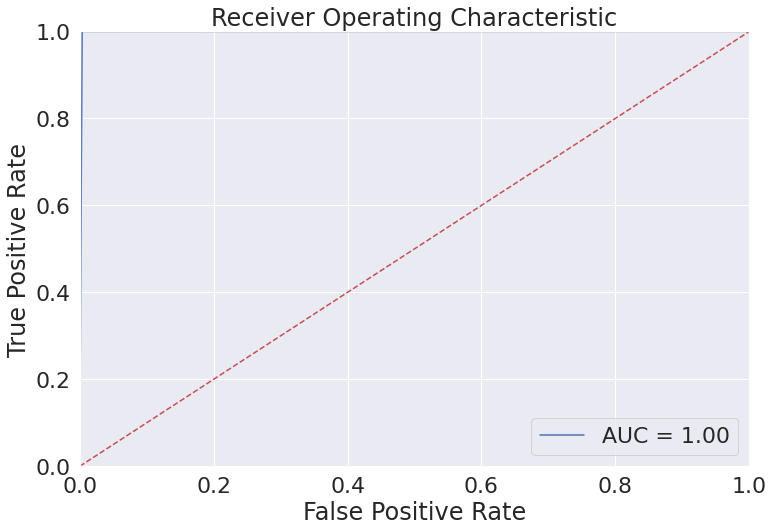

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [64]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.4. ANNEAL

### Train

In [65]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='anneal')

--------------Training and testing in the same device----------------
(69366, 115) (69366,)
------------Scale data-----------------
(69366, 115) (69366,)
X_train_scaled
[[ 3.00597876e-03  1.84273989e-01  0.00000000e+00 ...  3.74036249e-16
   1.74152528e-28  3.83142753e-13]
 [ 3.00597876e-03  1.77047558e-01  0.00000000e+00 ...  6.69037812e-16
  -1.63225311e-32  0.00000000e+00]
 [ 6.00620057e-03  1.84273989e-01  2.84335042e-17 ...  3.74036249e-16
   5.14489822e-32  1.13394775e-16]
 ...
 [ 3.00597922e-03  1.08396475e-01  4.12813862e-09 ...  1.86558621e-16
  -3.20987013e-32 -1.41904724e-16]
 [ 8.99079337e-03  1.84273989e-01  5.68670084e-17 ...  3.34518906e-16
  -1.01076761e-34  0.00000000e+00]
 [ 1.20233264e-02  1.84273989e-01  2.84335042e-17 ...  8.89599728e-15
   3.25540020e-26  2.95419833e-12]]
---------Normalize data--------------
(69366, 115) (69366,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.712     0.997     0.831     14865
           2      1.000     0.937     0.967     94995

    accuracy                          0.945    109860
   macro avg      0.856     0.967     0.899    109860
weighted avg      0.961     0.945     0.949    109860



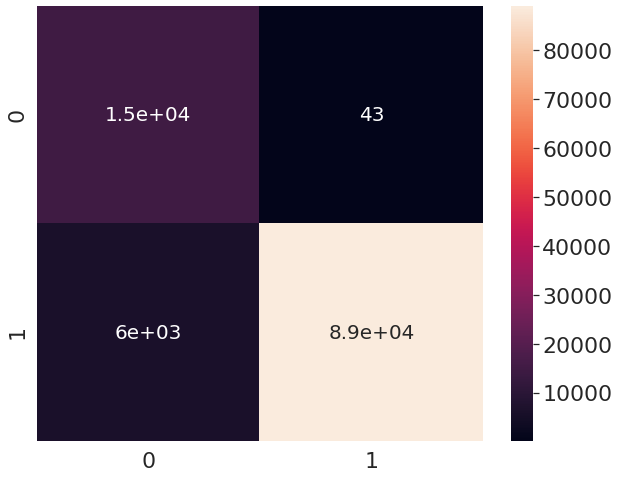

AUC score:  0.967051991530278


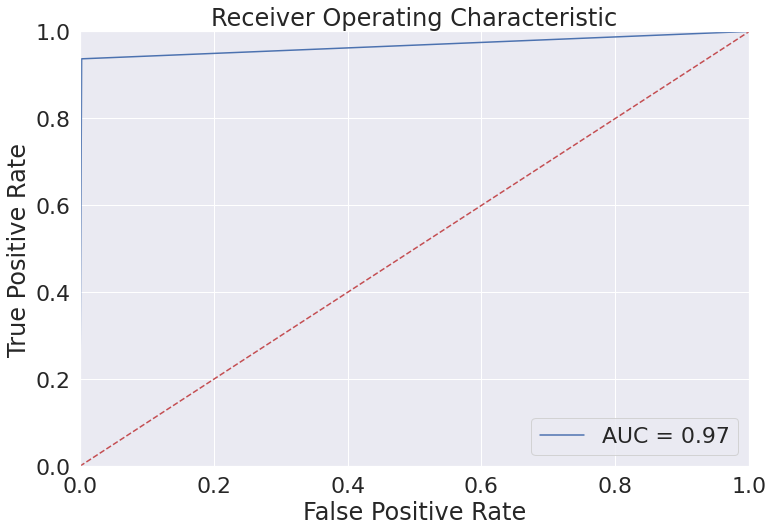

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [66]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.713     0.997     0.831     14865
           2      1.000     0.937     0.967     94995

    accuracy                          0.945    109860
   macro avg      0.856     0.967     0.899    109860
weighted avg      0.961     0.945     0.949    109860



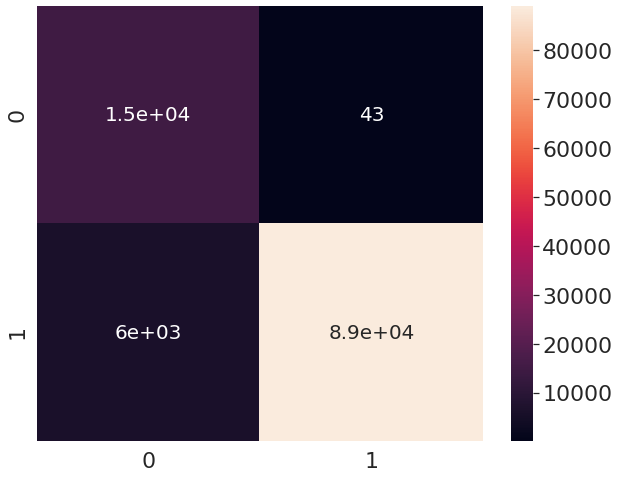

AUC score:  0.9670940990096192


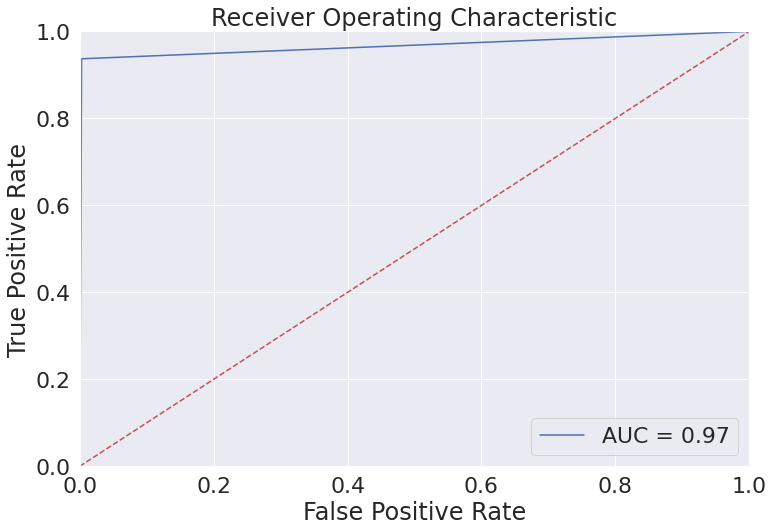

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.990     0.997     0.994     10413
           2      1.000     0.999     1.000    136933

    accuracy                          0.999    147346
   macro avg      0.995     0.998     0.997    147346
weighted avg      0.999     0.999     0.999    147346



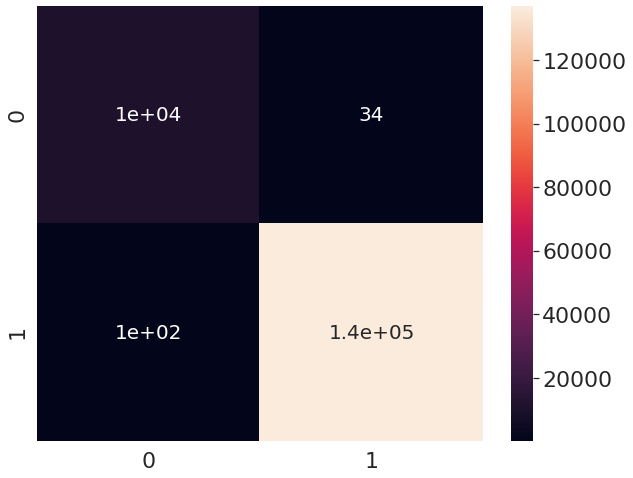

AUC score:  0.9979986318361675


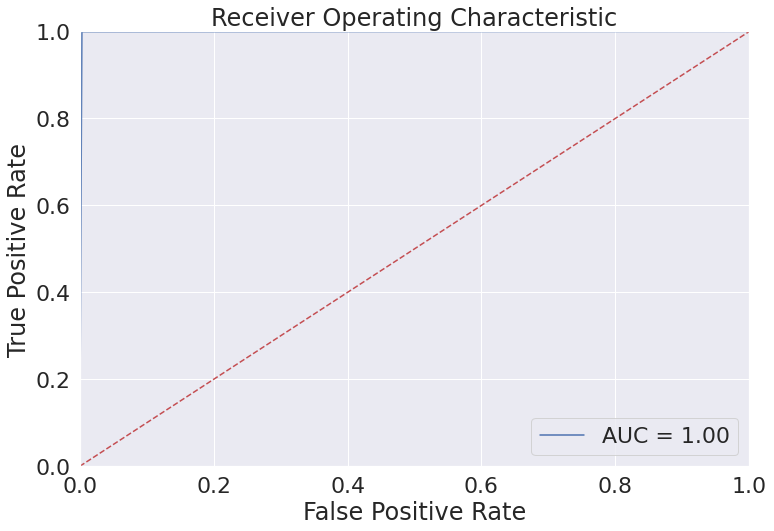

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.991     0.997     0.994     10413
           2      1.000     0.999     1.000    136933

    accuracy                          0.999    147346
   macro avg      0.996     0.998     0.997    147346
weighted avg      0.999     0.999     0.999    147346



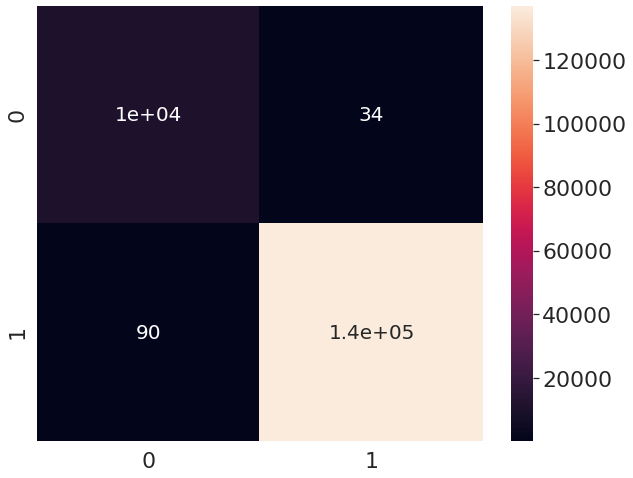

AUC score:  0.9980387974646135


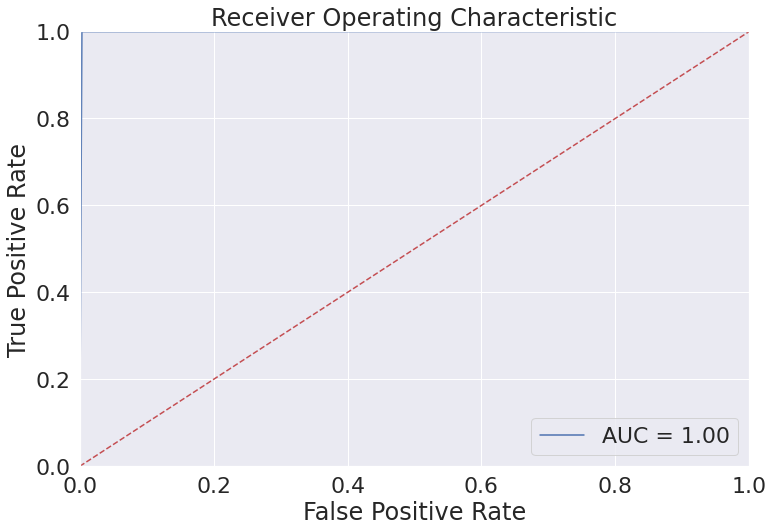

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)